In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

src = Path('/mnt/hdd/data/MMMedViT_data/data')

In [2]:
meta = pd.read_csv(src / 'meta.csv', index_col=0)
meta.columns.tolist()

['subject_id',
 'hadm_id',
 'stay_id',
 'id_ehr',
 'id_cxr',
 'last_careunit',
 'intime',
 'outtime',
 'los',
 'admittime',
 'dischtime',
 'deathtime',
 'ethnicity',
 'gender',
 'anchor_age',
 'dod',
 'age',
 'mortality_inunit',
 'mortality',
 'mortality_inhospital',
 'y_true',
 'last_echo_id',
 'last_ecg_id',
 'split',
 'study_id_cxr',
 'demographics_text2',
 'demographics_text',
 'cxr_text',
 'ecg_text',
 'med_text',
 'icd_text']

In [53]:
meds = pd.read_csv(src / 'meds_within_48h.csv')
meds

,stay_id,subject_id,hadm_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,...,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,statusdescription,originalamount,originalrate,label,time_since_intime
0,37510196,10001884,26184834,29855,2131-01-12 23:43:00,2131-01-12 23:44:00,2131-01-12 23:43:00,225154,1.000000,mg,...,65.0,NaN,NaN,0,0,FinishedRunning,1.000000,1.000000,Morphine Sulfate,43.381944
1,37510196,10001884,26184834,36518,2131-01-12 08:48:00,2131-01-12 08:49:00,2131-01-12 08:48:00,225910,1.000000,dose,...,65.0,10.0,ml,0,0,FinishedRunning,1.000000,1.000000,Pantoprazole (Protonix),28.465278
2,37510196,10001884,26184834,36518,2131-01-12 11:17:00,2131-01-12 17:23:00,2131-01-12 11:28:00,222168,475.092154,mg,...,65.0,100.0,ml,0,0,Stopped,663.311768,20.000000,Propofol,30.948611
3,37510196,10001884,26184834,36518,2131-01-12 11:22:00,2131-01-12 12:42:00,2131-01-12 12:29:00,225152,1394.543152,units,...,65.0,250.0,ml,0,0,FinishedRunning,1394.542969,1040.969727,Heparin Sodium,31.031944
4,37510196,10001884,26184834,36518,2131-01-12 12:42:00,2131-01-12 18:11:00,2131-01-12 12:29:00,225152,5509.341850,units,...,65.0,250.0,ml,0,0,ChangeDose/Rate,25000.000000,1000.000000,Heparin Sodium,32.365278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268029,32336619,19999442,26785317,59028,2148-11-20 00:16:00,2148-11-20 01:13:00,2148-11-20 01:42:00,222168,354.746839,mg,...,107.5,100.0,ml,0,0,ChangeDose/Rate,1000.000000,60.000008,Propofol,9.871389
268030,32336619,19999442,26785317,59028,2148-11-20 01:13:00,2148-11-20 02:56:00,2148-11-20 01:42:00,222168,427.782282,mg,...,107.5,100.0,ml,0,0,ChangeDose/Rate,643.750000,40.000004,Propofol,10.821389
268031,32336619,19999442,26785317,59028,2148-11-20 02:56:00,2148-11-20 04:15:00,2148-11-20 08:38:00,222168,206.470988,mg,...,107.5,100.0,ml,0,0,FinishedRunning,206.470993,25.110836,Propofol,12.538056
268032,32336619,19999442,26785317,59028,2148-11-21 00:00:00,2148-11-21 00:01:00,2148-11-21 04:10:00,221833,1.000000,mg,...,107.5,NaN,NaN,0,0,FinishedRunning,1.000000,1.000000,Hydromorphone (Dilaudid),33.604722


In [3]:
# hadm_id = 28503629
# meta_id = meta[meta.hadm_id==hadm_id].iloc[0]
stay_id = 39951232
meta_id = meta[meta.stay_id==stay_id].iloc[0]
ehr = pd.read_csv(src / 'labs_timeseries' / meta_id.split / f'{meta_id.stay_id}.csv')
ehr = ehr[(ehr.Hours<=48)&(ehr.Hours>=0)]
ehr = ehr.drop(columns=['index']).set_index('Hours')
ehr

,Troponin-T,Potassium (serum),Sodium (serum),Hemoglobin,Lactic Acid,Creatinine (serum),CK (CPK),Direct Bilirubin,Total Bilirubin,C Reactive Protein (CRP),...,Non Invasive Blood Pressure systolic,Non Invasive Blood Pressure diastolic,Non Invasive Blood Pressure mean,Respiratory Rate,Temperature Fahrenheit,Inspired O2 Fraction,PAR-Oxygen saturation,Glucose (whole blood),PH (Venous),PH (Arterial)
Hours,,,,,,,,,,,,,,,,,,,,,
0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47.665556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN
47.665556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN
47.665556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
meta_id

subject_id                                                       12106204
hadm_id                                                          25612921
stay_id                                                          39951232
id_ehr                                   12106204_episode1_timeseries.csv
id_cxr                       2c29d963-ab9ad296-cd3db9ed-d0ce4c35-b82d08e5
last_careunit                Cardiac Vascular Intensive Care Unit (CVICU)
intime                                                2163-05-27 11:20:04
outtime                                               2163-06-11 17:35:17
los                                                             15.260567
admittime                                             2163-05-20 18:39:00
dischtime                                             2163-06-13 15:30:00
deathtime                                                             NaN
ethnicity                                                           WHITE
gender                                

In [65]:
import json
with open('med_categories.json','r') as f:
    med_categories = json.load(f)
med_categories_t = {v: k for k, values in med_categories.items() for v in values}
all_meds = list(med_categories_t)
all_meds

['Amiodarone 600/500',
 'Amiodarone',
 'Lidocaine',
 'Adenosine',
 'Procainamide',
 'Potassium Chloride',
 'Calcium Gluconate',
 'Calcium Gluconate (CRRT)',
 'K Phos',
 'Na Phos',
 'Metoprolol',
 'Labetalol',
 'Esmolol',
 'Furosemide (Lasix)',
 'Furosemide (Lasix) 250/50',
 'Mannitol',
 'Digoxin (Lanoxin)',
 'Insulin - Regular',
 'Insulin - Humalog',
 'Insulin - Glargine',
 'Insulin - NPH',
 'Insulin - 70/30',
 'Insulin - Novolog',
 'Insulin - Humalog 75/25',
 'Fentanyl',
 'Fentanyl (Concentrate)',
 'Hydromorphone (Dilaudid)',
 'Morphine Sulfate',
 'Meperidine (Demerol)',
 'Methadone Hydrochloride',
 'Propofol',
 'Midazolam (Versed)',
 'Dexmedetomidine (Precedex)',
 'Lorazepam (Ativan)',
 'Ketamine',
 'Diazepam (Valium)',
 'Pentobarbital',
 'Alteplase (TPA)',
 'Norepinephrine',
 'Phenylephrine',
 'Epinephrine',
 'Dopamine',
 'Vasopressin',
 'Milrinone',
 'Dobutamine',
 'Isuprel']

In [69]:
meds_id = meds[meds.stay_id==stay_id]
meds_id = meds_id[meds_id.label.isin(all_meds)].dropna(subset=['totalamount'])
meds_id

,stay_id,subject_id,hadm_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,...,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,statusdescription,originalamount,originalrate,label,time_since_intime
56269,39951232,12106204,25612921,27016,2163-05-28 08:40:00,2163-05-28 09:51:00,2163-05-28 08:58:00,225150,62.831857,mcg,...,75.6,50.0,ml,0,0,ChangeDose/Rate,200.000000,0.700000,Dexmedetomidine (Precedex),21.332222
56272,39951232,12106204,25612921,27016,2163-05-28 08:58:00,2163-05-28 09:55:00,2163-05-28 08:55:00,223258,1.900000,units,...,75.6,100.0,ml,0,0,ChangeDose/Rate,94.366669,2.000000,Insulin - Regular,21.632222
56274,39951232,12106204,25612921,27016,2163-05-28 09:51:00,2163-05-28 10:58:00,2163-05-28 09:54:00,225150,42.351451,mcg,...,75.6,50.0,ml,0,0,ChangeDose/Rate,137.168137,0.500000,Dexmedetomidine (Precedex),22.515556
56275,39951232,12106204,25612921,27016,2163-05-28 09:55:00,2163-05-28 11:20:00,2163-05-28 09:52:00,223258,4.250766,units,...,75.6,100.0,ml,0,0,Stopped,92.466667,3.000000,Insulin - Regular,22.582222
56277,39951232,12106204,25612921,27016,2163-05-28 10:58:00,2163-05-28 11:36:00,2163-05-28 11:41:00,225150,14.412138,mcg,...,75.6,50.0,ml,0,0,Stopped,94.816689,0.300000,Dexmedetomidine (Precedex),23.632222
56281,39951232,12106204,25612921,27016,2163-05-28 11:24:00,2163-05-28 12:24:00,2163-05-28 11:24:00,221456,2.000000,grams,...,75.6,100.0,ml,0,0,FinishedRunning,2.000000,0.033333,Calcium Gluconate,24.065556
56282,39951232,12106204,25612921,27016,2163-05-28 11:24:00,2163-05-28 12:24:00,2163-05-28 12:43:00,225166,20.000001,mEq,...,75.6,50.0,ml,0,0,FinishedRunning,20.000000,0.000000,Potassium Chloride,24.065556
56284,39951232,12106204,25612921,27016,2163-05-28 12:24:00,2163-05-28 13:24:00,2163-05-28 12:43:00,225166,20.000001,mEq,...,75.6,50.0,ml,0,0,FinishedRunning,20.000000,0.333333,Potassium Chloride,25.065556
56288,39951232,12106204,25612921,27016,2163-05-28 13:34:00,2163-05-28 14:34:00,2163-05-28 13:34:00,225166,20.000001,mEq,...,75.6,50.0,ml,0,0,FinishedRunning,20.000000,0.333333,Potassium Chloride,26.232222
56293,39951232,12106204,25612921,44490,2163-05-27 14:45:00,2163-05-27 14:55:00,2163-05-27 15:02:00,222168,30.303029,mg,...,75.6,100.0,ml,0,0,ChangeDose/Rate,1000.000000,40.000004,Propofol,3.415556


In [153]:
admissions = pd.read_csv('/mnt/sds/sd20i001/malte/data/physionet.org/files/mimiciv/2.2/hosp/admissions.csv.gz')

In [173]:
admission_id = admissions[admissions.hadm_id==meta_id.hadm_id]
admission_id

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
89702,12106204,25612921,2163-05-20 18:39:00,2163-06-13 15:30:00,NaN,EW EMER.,P85Q3X,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,?,WIDOWED,WHITE,2163-05-20 17:58:00,2163-05-20 21:33:00,0


In [158]:
cxr_meta = pd.read_csv('/mnt/sds/sd20i001/malte/data/physionet.org/files/mimic-cxr-jpg/2.0.0/mimic-cxr-2.0.0-metadata.csv')
cxr_meta

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),lateral,Erect
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),postero-anterior,Erect
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,CHEST (PA AND LAT),lateral,Erect
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,CHEST (PORTABLE AP),antero-posterior,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
377105,428e2c18-5721d8f3-35a05001-36f3d080-9053b83c,19999733,57132437,CHEST (PA AND LAT),PA,3056,2544,21520708,224550.171,CHEST (PA AND LAT),postero-anterior,Erect
377106,58c403aa-35ff8bd9-73e39f54-8dc9cc5d-e0ec3fa9,19999733,57132437,CHEST (PA AND LAT),LATERAL,3056,2544,21520708,224550.171,CHEST (PA AND LAT),lateral,Erect
377107,58766883-376a15ce-3b323a28-6af950a0-16b793bd,19999987,55368167,CHEST (PORTABLE AP),AP,2544,3056,21451104,51448.218,CHEST (PORTABLE AP),antero-posterior,Erect
377108,7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08,19999987,58621812,CHEST (PORTABLE AP),AP,3056,2544,21451102,202809.234,CHEST (PORTABLE AP),antero-posterior,Erect


In [171]:
cxr_meta.apply(lambda x: f'{str(x.StudyDate)[:4]}-{str(x.StudyDate)[4:6]}-{str(x.StudyDate)[6:]} {str(x.StudyTime).split(".")[0]}',axis=1)

0         2180-05-06 213014
1         2180-05-06 213014
2         2180-06-26 165500
3         2180-06-26 165500
4          2180-07-23 80556
                ...        
377105    2152-07-08 224550
377106    2152-07-08 224550
377107     2145-11-04 51448
377108    2145-11-02 202809
377109     2145-11-03 50507
Length: 377110, dtype: object

In [170]:
cxr_meta.StudyTime

0         213014.531
1         213014.531
2         165500.312
3         165500.312
4          80556.875
             ...    
377105    224550.171
377106    224550.171
377107     51448.218
377108    202809.234
377109     50507.625
Name: StudyTime, Length: 377110, dtype: float64

In [177]:
admittime

89702   2163-05-20 18:39:00
Name: admittime, dtype: datetime64[ns]

In [180]:
admittime, dischtime

(Timestamp('2163-05-20 18:39:00'), Timestamp('2163-06-13 15:30:00'))

In [193]:
import warnings
warnings.filterwarnings('ignore')

for hadm_id in meta.hadm_id:
    admission_id = admissions[admissions.hadm_id==hadm_id]
    if not len(admission_id):
        continue
    admittime = pd.to_datetime(admission_id.admittime).iloc[0]
    dischtime = pd.to_datetime(admission_id.dischtime).iloc[0]
    cxr_meta_id = cxr_meta[
        (cxr_meta.subject_id==meta_id.subject_id)
    ]
    cxr_meta_id['StudyDateTime'] = pd.to_datetime(cxr_meta_id.apply(lambda x: f'{str(x.StudyDate)[:4]}-{str(x.StudyDate)[4:6]}-{str(x.StudyDate)[6:]} {str(x.StudyTime).split(".")[0]}',axis=1))
    cxr_meta_id = cxr_meta_id[
        (cxr_meta_id.StudyDateTime>=admittime)&
        (cxr_meta_id.StudyDateTime<=dischtime)
    ]
    if not len(cxr_meta_id):
        continue
    cxr_meta_id['timedelta'] = cxr_meta_id.StudyDateTime.apply(lambda t: (t - admittime)) / pd.Timedelta(hours=1)
    cxr_meta_id = cxr_meta_id[cxr_meta_id.timedelta<=48]
    print(hadm_id, len(cxr_meta_id))

27668896 0
27417658 1
20563201 0
26344655 0
28189835 0
27276421 0
27096409 0
29393389 0
25612921 0


In [191]:
admission_id

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag


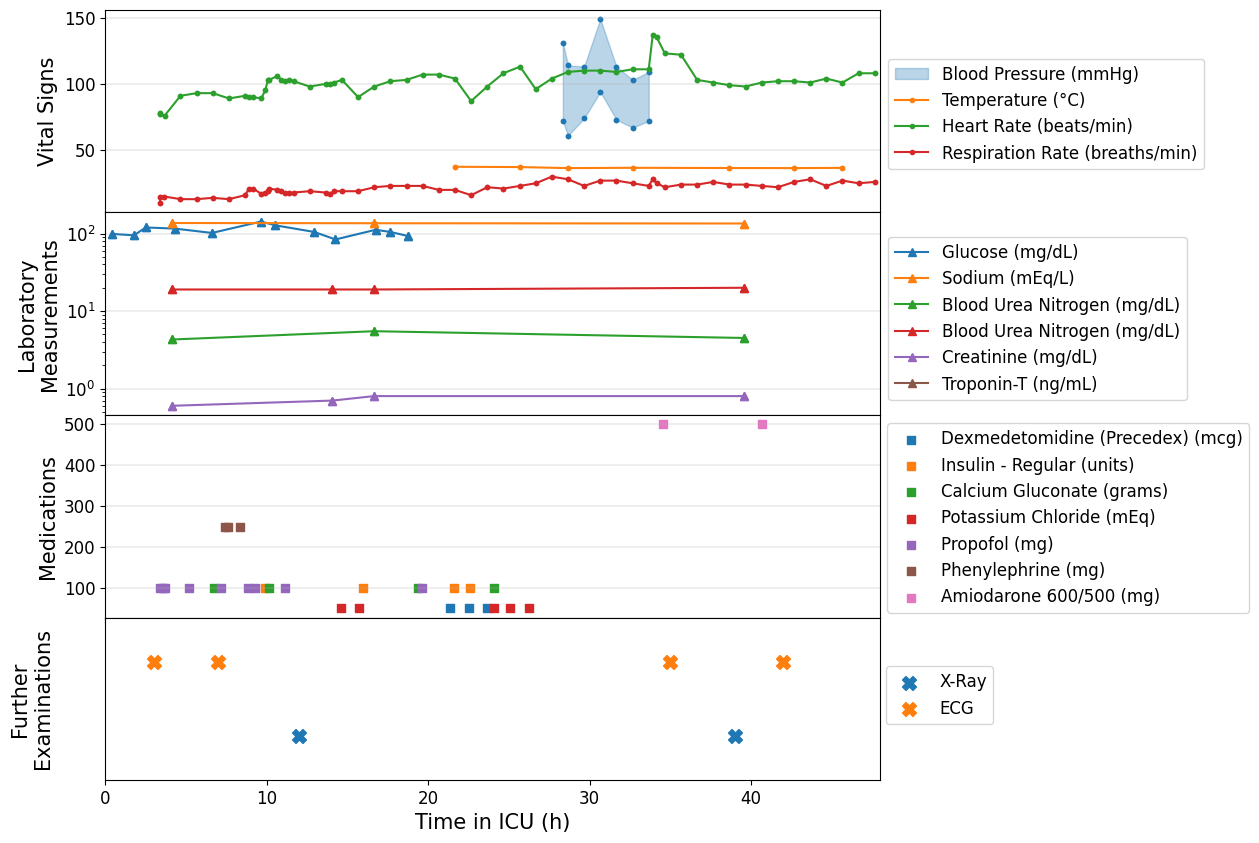

In [227]:
to_num = lambda x: pd.to_numeric(x, errors='coerce').dropna()

# sns.set()
cp = sns.color_palette()

fig = plt.figure(figsize=(10,10))
# fig.suptitle('ICU Patient Journey (48h)')
plt.rcParams.update({'font.size': 12})
gs = fig.add_gridspec(4, hspace=0., height_ratios=[1, 1, 1, 0.8])
ax0, ax1, ax2, ax3 = gs.subplots(sharex=True, sharey=False)

# max_label_length = 35
# pad_label = lambda l: l + "\u00A0"*(max_label_length-len(l))

## VTAL SIGNS
# Blood Pressure
bp_sys = to_num(ehr['Non Invasive Blood Pressure systolic'])
bp_dias = to_num(ehr['Non Invasive Blood Pressure diastolic'])
ax = ax0
ax.fill_between(
    bp_dias.index,
    bp_sys,
    bp_dias,
    alpha=0.3,
    label='Blood Pressure (mmHg)',
    color=cp[0]
)
ax.scatter(bp_sys.index, bp_sys, color=cp[0], marker='.')
ax.scatter(bp_dias.index, bp_dias, color=cp[0], marker='.')
# ax.set_title('Vital Signs')

# Temperature
T = to_num(ehr['Temperature Fahrenheit'])
T = (5/9) * (T - 32)
ax.plot(T, marker='.', label='Temperature (°C)', color=cp[1])

# Heart Rate
hr = to_num(ehr['Heart Rate'])
ax.plot(hr, marker='.', label='Heart Rate (beats/min)', color=cp[2])

# Respiratory Rate
rr = to_num(ehr['Respiratory Rate'])
ax.plot(rr, marker='.', label='Respiration Rate (breaths/min)', color=cp[3])

## LABORATORY MEASUREMENTS
ax = ax1
# ax.set_title('Laboratory Measurements')
marker = '^'
# Glucose
g = to_num(ehr['Glucose (whole blood)'])
ax.plot(g, marker=marker, label='Glucose (mg/dL)', color=cp[0])

# Sodium
s = to_num(ehr['Sodium (serum)'])
ax.plot(s, marker=marker, label='Sodium (mEq/L)', color=cp[1])

# Potassium
p = to_num(ehr['Potassium (serum)'])
ax.plot(p, marker=marker, label='Blood Urea Nitrogen (mg/dL)', color=cp[2])

# Blood Urea Nitrogen
bun = to_num(ehr['BUN'])
ax.plot(bun, marker=marker, label='Blood Urea Nitrogen (mg/dL)', color=cp[3])

# Creatinine
c = to_num(ehr['Creatinine (serum)'])
ax.plot(c, marker=marker, label='Creatinine (mg/dL)', color=cp[4])

# Troponin-T
tt = to_num(ehr['Troponin-T'])
ax.plot(tt.index, tt, marker=marker, label='Troponin-T (ng/mL)', color=cp[5])

### MEDICATIONS
ax = ax2
# ax.set_title('Medications')
for i, m in enumerate(meds_id.label.unique()):
    m_meds_id = meds_id[meds_id.label==m]
    ax.scatter(
        m_meds_id.time_since_intime, 
        m_meds_id.totalamount,
        marker='s',
        color=cp[i],
        label=f'{m} ({m_meds_id.amountuom.iloc[0]})'
    )

## FURTHER EXAMINATIONS
ax = ax3
ax.scatter([12,39],[0.5,0.5],marker='X',label='X-Ray',color=cp[0],s=100)
ax.scatter([3,7,35,42],[1,1,1,1],marker='X',label='ECG',color=cp[1],s=100)
ax.set_ylim([0.2,1.3])

ax0.set_xlim([0,48])
ax1.set_xlim([0,48])
ax2.set_xlim([0,48])

ax0.grid(True,axis='y',linewidth=0.3)
ax1.grid(True,axis='y',linewidth=0.3)
ax1.set_yscale('log')
ax2.grid(True,axis='y',linewidth=0.3)
ax3.grid(False)
ax3.set_yticks([])

# ax0.legend(loc='upper left', framealpha=1)
l0 = ax0.legend(bbox_to_anchor=(1.0,0.8))#,borderpad=2)
l1 = ax1.legend(bbox_to_anchor=(1.0,0.92))#,borderpad=2.3)
l2 = ax2.legend(bbox_to_anchor=(1.487,1.0))
l3 = ax3.legend(loc='upper right', bbox_to_anchor=(1.157,0.75))

ax0.set_ylabel('Vital Signs', fontsize=15)
ax1.set_ylabel('Laboratory\nMeasurements', fontsize=15)
ax2.set_ylabel('Medications', fontsize=15)
ax3.set_ylabel('Further\nExaminations\n\n ', fontsize=15)

ax3.set_xlabel('Time in ICU (h)', fontsize=15)
# fig.tight_layout()
fig.savefig('images/patient_journey.pdf', bbox_inches='tight')

In [228]:
admission_id.hadm_id

153776    28016813
Name: hadm_id, dtype: int64